<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Advanced Surface Observations: Working with Mesonet Data</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://weather-geek.net/images/metar_what.png" alt="METAR" style="height: 200px;"></div>

### Questions
1. How do I read in complicated mesonet data with Pandas?
1. How do I merge multiple Pandas DataFrames?
1. What's the best way to make a station plot of data?
1. How can I make a time series of data from one station?

### Objectives
1. <a href="#reading">Read Mesonet data with Pandas</a>
2. <a href="#merge">Merge multiple Pandas DataFrames together </a>
3. <a href="#plot">Plot mesonet data with MetPy and CartoPy</a>
4. <a href="#timeseries">Create time series plots of station data</a>

<a name="reading"></a>
# Reading Mesonet Data

In this notebook, we're going to use the Pandas library to read text-based data. Pandas is excellent at handling text, csv, and other files. However, you have to help Pandas figure out how your data is formatted sometimes. Lucky for you, mesonet data frequently comes in forms that are not the most user-friendly. Through this notebook, we'll see how these complicated datasets can be handled nicely by Pandas to create useful station plots for hand analysis or publication. 

In [1]:
# Import Pandas
import pandas as pd

### West Texas Mesonet

The [West Texas Mesonet](http://www.depts.ttu.edu/nwi/research/facilities/wtm/index.php) is a wonderful data source for researchers and storm chasers alike! We have some 5-minute observations from the entire network on 22 March 2019 that we'll analyze in this notebook.

Pandas can parse time into a nice internal storage format as we read in the file. If the time is specified in the file in a somewhat standard form, pandas will even guess at the format if you tell it which column to use. However, in this case the time is reported in a horrible format: between one and four characters that, if there are four characters, represent hours and minutes as HHMM. Let's turn take a charater string, turn it into an integer, and then use integer string formatting to write out a four character string.

In [2]:
for t in ['0', '05', '100', '1005']:
    print('{0:04d}'.format(int(t)))

0000
0005
0100
1005


Pandas can be told how to parse non-standard dates formats by writing an arbitrary function that takes a string and returns a datetime. Here's what that function looks like in this case. We can use timedelta to convert hours and minutes, and then add them to the start date using date math.

In [3]:
def parse_tx_date(v, start_date=None):
    s = '{0:04d}'.format(int(v)) # regularize the data to a four character string
    hour = pd.to_timedelta(int(s[0:2]), 'hour') 
    minute = pd.to_timedelta(int(s[2:4]), 'minute')
    return start_date + hour + minute

In [4]:
# Read in the data and handle the lines that cause issues

# Get a nice date variable cooresponding to the start time
start_date = pd.datetime.strptime('2019-03-22', '%Y-%m-%d')
print(start_date)

# Pre-apply the start date to our date parsing function, so that pandas only passes one value
from functools import partial
date_parser = partial(parse_tx_date, start_date=start_date)

filename = 'West_Texas_data/FIVEMIN_82.txt'
tx_data = pd.read_csv(filename, delimiter=',', header=None, error_bad_lines=False, warn_bad_lines=False,
                     parse_dates=[2], date_parser=date_parser
                     )
tx_data

2019-03-22 00:00:00


/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


0   1                   2   3       4       5       6       7       8   \
0       1  81 2019-03-22 00:00:00  54   2.337   2.334   84.90   2.864   0.199   
1       2  81 2019-03-22 00:00:00  54  15.050  15.180   14.45  15.480  15.180   
2       1  81 2019-03-22 00:00:00  32   1.780   1.774   92.80   4.638   0.181   
3       2  81 2019-03-22 00:00:00  32  11.840  12.540   12.23  11.520  12.860   
4       2  81 2019-03-22 00:00:00  42   9.700  11.140    9.62   9.020   9.790   
...    ..  ..                 ...  ..     ...     ...     ...     ...     ...   
22938   1  81 2019-03-22 23:55:00  23   9.340   9.280  269.20   6.259   1.323   
22939   1  81 2019-03-22 23:56:00  60   5.947   5.898  267.00   7.330   0.949   
22940   1  81 2019-03-22 23:57:00  60   8.720   8.650  277.30   7.250   0.738   
22941   1  81 2019-03-22 23:58:00  60   9.530   9.440  275.10   8.220   1.509   
22942   1  81 2019-03-22 23:59:00  60   9.520   9.440  265.30   7.660   1.217   

           9       10      11      12      13      14       15      16     17  \
0       2.842  11.810  12.950  12.030  55.080  350.80     0.00   2.855  1.195   
1       0.272   0.380   0.395   0.262   0.000   13.26  2812.00     NaN    NaN   
2       2.058   6.974  12.090   7.400  71.800  339.50     0.00   2.025  0.786   
3       0.239   0.233   0.165  -0.073   7.650   12.36  2570.00     NaN    NaN   
4       0.407   0.700   0.094   0.033   1.218   12.49   659.60     NaN    NaN   
...       ...     ...     ...     ...     ...     ...      ...     ...    ...   
22938  13.950  13.550  14.300  13.540  68.380  302.40     0.01   7.450  7.050   
22939   8.560  13.300  13.650  13.460  13.880  229.60     0.00 -13.660  4.250   
22940  10.060  13.270  13.790  13.510  13.730  229.50     0.00 -13.810  6.325   
22941  12.670  13.270  13.730  13.420  14.020  229.60     0.00 -13.560  6.112   
22942  11.370  13.250  13.910  13.570  13.680  229.50     0.00 -13.870  6.675   

        18  
0      0.0  
1      NaN  
2      0.0  
3      NaN  
4      NaN  
...    ...  
22938  0.0  
22939  0.0  
22940  0.0  
22941  0.0  
22942  0.0  

[22943 rows x 19 columns]

In [5]:
# Rename columns to be understandable
tx_data.columns = ['Array_ID', 'QC_flag', 'Time', 'Station_ID', '10m_scalar_wind_speed',
                 '10m_vector_wind_speed', '10m_wind_direction',
                 '10m_wind_direction_std', '10m_wind_speed_std', 
                 '10m_gust_wind_speed', '1.5m_temperature', 
                 '9m_temperature', '2m_temperature', 
                 '1.5m_relative_humidity', 'station_pressure', 'rainfall', 
                 'dewpoint', '2m_wind_speed', 'solar_radiation']
tx_data

Array_ID  QC_flag                Time  Station_ID  \
0             1       81 2019-03-22 00:00:00          54   
1             2       81 2019-03-22 00:00:00          54   
2             1       81 2019-03-22 00:00:00          32   
3             2       81 2019-03-22 00:00:00          32   
4             2       81 2019-03-22 00:00:00          42   
...         ...      ...                 ...         ...   
22938         1       81 2019-03-22 23:55:00          23   
22939         1       81 2019-03-22 23:56:00          60   
22940         1       81 2019-03-22 23:57:00          60   
22941         1       81 2019-03-22 23:58:00          60   
22942         1       81 2019-03-22 23:59:00          60   

       10m_scalar_wind_speed  10m_vector_wind_speed  10m_wind_direction  \
0                      2.337                  2.334               84.90   
1                     15.050                 15.180               14.45   
2                      1.780                  1.774               92.80   
3                     11.840                 12.540               12.23   
4                      9.700                 11.140                9.62   
...                      ...                    ...                 ...   
22938                  9.340                  9.280              269.20   
22939                  5.947                  5.898              267.00   
22940                  8.720                  8.650              277.30   
22941                  9.530                  9.440              275.10   
22942                  9.520                  9.440              265.30   

       10m_wind_direction_std  10m_wind_speed_std  10m_gust_wind_speed  \
0                       2.864               0.199                2.842   
1                      15.480              15.180                0.272   
2                       4.638               0.181                2.058   
3                      11.520              12.860                0.239   
4                       9.020               9.790                0.407   
...                       ...                 ...                  ...   
22938                   6.259               1.323               13.950   
22939                   7.330               0.949                8.560   
22940                   7.250               0.738               10.060   
22941                   8.220               1.509               12.670   
22942                   7.660               1.217               11.370   

       1.5m_temperature  9m_temperature  2m_temperature  \
0                11.810          12.950          12.030   
1                 0.380           0.395           0.262   
2                 6.974          12.090           7.400   
3                 0.233           0.165          -0.073   
4                 0.700           0.094           0.033   
...                 ...             ...             ...   
22938            13.550          14.300          13.540   
22939            13.300          13.650          13.460   
22940            13.270          13.790          13.510   
22941            13.270          13.730          13.420   
22942            13.250          13.910          13.570   

       1.5m_relative_humidity  station_pressure  rainfall  dewpoint  \
0                      55.080            350.80      0.00     2.855   
1                       0.000             13.26   2812.00       NaN   
2                      71.800            339.50      0.00     2.025   
3                       7.650             12.36   2570.00       NaN   
4                       1.218             12.49    659.60       NaN   
...                       ...               ...       ...       ...   
22938                  68.380            302.40      0.01     7.450   
22939                  13.880            229.60      0.00   -13.660   
22940                  13.730            229.50      0.00   -13.810   
22941                  14.020            229.60      0.00   -13.560   
22942 

The West Texas mesonet provides data on weather, agriculture, and radiation. These different observations are encoded 1, 2, and 3, respectively in the Array ID column. Let's parse out only the meteorological data for this exercise.

In [6]:
# Remove non-meteorological rows
tx_data = tx_data[tx_data['Array_ID'] == 1]
tx_data

Array_ID  QC_flag                Time  Station_ID  \
0             1       81 2019-03-22 00:00:00          54   
2             1       81 2019-03-22 00:00:00          32   
5             1       81 2019-03-22 00:00:00           7   
7             1       81 2019-03-22 00:00:00          39   
9             1       81 2019-03-22 00:00:00          56   
...         ...      ...                 ...         ...   
22938         1       81 2019-03-22 23:55:00          23   
22939         1       81 2019-03-22 23:56:00          60   
22940         1       81 2019-03-22 23:57:00          60   
22941         1       81 2019-03-22 23:58:00          60   
22942         1       81 2019-03-22 23:59:00          60   

       10m_scalar_wind_speed  10m_vector_wind_speed  10m_wind_direction  \
0                      2.337                  2.334                84.9   
2                      1.780                  1.774                92.8   
5                      3.103                  3.030               189.6   
7                      2.423                  2.422               118.3   
9                      3.464                  3.451               124.2   
...                      ...                    ...                 ...   
22938                  9.340                  9.280               269.2   
22939                  5.947                  5.898               267.0   
22940                  8.720                  8.650               277.3   
22941                  9.530                  9.440               275.1   
22942                  9.520                  9.440               265.3   

       10m_wind_direction_std  10m_wind_speed_std  10m_gust_wind_speed  \
0                       2.864               0.199                2.842   
2                       4.638               0.181                2.058   
5                      12.440               0.150                3.365   
7                       1.353               0.097                2.744   
9                       4.929               0.292                4.279   
...                       ...                 ...                  ...   
22938                   6.259               1.323               13.950   
22939                   7.330               0.949                8.560   
22940                   7.250               0.738               10.060   
22941                   8.220               1.509               12.670   
22942                   7.660               1.217               11.370   

       1.5m_temperature  9m_temperature  2m_temperature  \
0                11.810           12.95           12.03   
2                 6.974           12.09            7.40   
5                10.680           12.65           11.10   
7                11.740           13.91           12.35   
9                13.950           14.99           14.06   
...                 ...             ...             ...   
22938            13.550           14.30           13.54   
22939            13.300           13.65           13.46   
22940            13.270           13.79           13.51   
22941            13.270           13.73           13.42   
22942            13.250           13.91           13.57   

       1.5m_relative_humidity  station_pressure  rainfall  dewpoint  \
0                       55.08             350.8      0.00     2.855   
2                       71.80             339.5      0.00     2.025   
5                       55.47             328.5      0.00     1.927   
7                       48.61             349.1      0.00     1.091   
9                       49.66             363.2      0.00     3.354   
...                       ...               ...       ...       ...   
22938                   68.38             302.4      0.01     7.450   
22939                   13.88             229.6      0.00   -13.660   
22940                   13.73             229.5      0.00   -13.810   
22941                   14.02             229.6      0.00   -13.560   
22942 

Station pressure is 600 hPa lower than it should be, so let's correct that as well!

In [7]:
# Correct presssure 
tx_data['station_pressure'] += 600
tx_data['station_pressure']

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        950.8
2        939.5
5        928.5
7        949.1
9        963.2
         ...  
22938    902.4
22939    829.6
22940    829.5
22941    829.6
22942    829.5
Name: station_pressure, Length: 17279, dtype: float64

Finally, let's read in the station metadata file for the West Texas mesonet, so that we can have coordinates to plot data later on.

In [8]:
tx_stations = pd.read_csv('WestTexas_stations.csv')
tx_stations

Location                            Area       Lat  \
0          5ENE Abernathy           Abernathy/Hale County  33.87538   
1             6WSW Adrian            Adrian/Oldham County  35.25347   
2              3WSW Aiken               Aiken/Hale County  34.13305   
3           7SSE Amarillo         Amarillo/Randall County  35.11270   
4           9NNE Amarillo          Amarillo/Potter County  35.33597   
..                    ...                             ...       ...   
121               2E Wall           Wall/Tom Green County  31.37882   
122          2NNE Weinert          Weinert/Haskell County  33.34468   
123                 Welch             Welch/Dawson County  32.92570   
124  6NW White River Lake  White River Lake/Crosby County  33.52533   
125        6SSW Wolfforth        Wolfforth/Lubbock County  33.42068   

          Long Elevation     ID 4 Letter ID LDM ID  Node  Logger ID SHEF ID  
0   -101.75718  3333 ft.   ABER        KARS   XARS  1365          2   ARST2  
1   -102.76158  4260 ft.   ADRI        KAD1   XAD1  1526        109   ADXT2  
2   -101.56952  3321 ft.   AIKE        KAI1   XAI1  1496         79   AIKT2  
3   -101.79964  3611 ft.   AMAS        KAM1   XAM1  1492         75   ASOT2  
4   -101.80627  3346 ft.   AMAN        KAM2   XAM2  1495         78   AMNT2  
..         ...       ...    ...         ...    ...   ...        ...     ...  
121 -100.26628   1870 ft  WALL2        KWA1   XWA1  1421         57   WGST2  
122  -99.66590   1504 ft   WEIN        KWE1   XWE1  1490         73   EIST2  
123 -102.13232   3121 ft   WELC        KWE2   XWE2  1512         96   WEHT2  
124 -101.16506  2704 ft.   WHIT        KWVS   XWVS  1390         27   WLST2  
125 -102.04983  3307 ft.   WOLF        KWOS   XWOS  1411         47   WOST2  

[126 rows x 11 columns]

### Oklahoma Data

Try reading in the Oklahoma Mesonet data located in the `201903222300.mdf` file using Pandas. Check out the documentation on Pandas if you run into issues! Make sure to handle missing values as well. Also read in the Oklahoma station data from the `Oklahoma_stations.csv` file. Only read in the station ID, latitude, and longitude columns from that file.

In [9]:
# Your code here


In [10]:
def parse_ok_date(v, start_date=None):
    s = '{0:04d}'.format(int(v)) # regularize the data to a four character string
    minute = pd.to_timedelta(int(s), 'minute')
    return start_date + minute

In [11]:
# %load solutions/read_ok.py


# Cell content replaced by load magic replacement.
ok_data = pd.read_csv('201903222300.mdf', skiprows=2, delim_whitespace=True, na_values=-999,
                                          parse_dates=[2], date_parser=partial(parse_ok_date, start_date=start_date))
ok_stations = pd.read_csv('Oklahoma_stations.csv', usecols=[1,7,8])
print(ok_data.head())
print(ok_stations.head())

   STID  STNM                TIME  RELH  TAIR  WSPD  WVEC  WDIR  WDSD  WSSD  \
0  ACME   110 2019-03-22 23:00:00    31  21.3   7.3   7.2   131   8.7   1.0   
1  ADAX     1 2019-03-22 23:00:00    30  20.9   3.3   3.2   136  17.4   0.8   
2  ALTU     2 2019-03-22 23:00:00    54  20.9   7.9   7.9   151   6.1   1.2   
3  ALV2   116 2019-03-22 23:00:00    35  20.4   8.0   7.9   114   9.1   1.2   
4  ANT2   135 2019-03-22 23:00:00    27  22.0   2.6   2.5   137  19.5   0.7   

   ...  TA9M  WS2M  TS10  TB10  TS05  TS25   TS60  TR05  TR25    TR60  
0  ...  21.3   6.0  15.1  17.2  15.9  11.6   10.8  1.59  1.49    1.41  
1  ...  20.6   2.3  14.9  19.5  16.6  13.1 -998.0  1.51  1.46 -998.00  
2  ...  20.9   6.0  12.9  15.4  15.0  11.6 -998.0  2.25  2.21 -998.00  
3  ...  19.8   6.7  10.3  15.7  11.5   9.0 -998.0  1.50  1.39 -998.00  
4  ...  21.6   1.9  14.4  19.1  16.4  12.5   12.0  1.67  1.38    1.33  

[5 rows x 24 columns]
   stid      nlat      elon
0  ACME  34.80833 -98.02325
1  ADAX  34.79

<a name="merge"></a>
# Merging DataFrames

We now have two data files per mesonet - one for the data itself and one for the metadata. It would be really nice to combine these DataFrames together into one for each mesonet. Pandas has some built in methods to do this - see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). For this example, we'll be using the `merge` method. First, let's rename columns in the Oklahoma station DataFrame to be more understandable.

In [12]:
# Rename columns so merging can occur
ok_stations.columns = ['STID', 'LAT', 'LON']

Conveniently, we have a `STID` column in both DataFrames. Let's base our merge on that and see what we get!

In [13]:
# Merge the two data frames based on the Station ID
ok_data = pd.merge(ok_data, ok_stations, on='STID')
ok_data

STID  STNM                TIME  RELH  TAIR  WSPD  WVEC  WDIR  WDSD  WSSD  \
0    ACME   110 2019-03-22 23:00:00    31  21.3   7.3   7.2   131   8.7   1.0   
1    ADAX     1 2019-03-22 23:00:00    30  20.9   3.3   3.2   136  17.4   0.8   
2    ALTU     2 2019-03-22 23:00:00    54  20.9   7.9   7.9   151   6.1   1.2   
3    ALV2   116 2019-03-22 23:00:00    35  20.4   8.0   7.9   114   9.1   1.2   
4    ANT2   135 2019-03-22 23:00:00    27  22.0   2.6   2.5   137  19.5   0.7   
..    ...   ...                 ...   ...   ...   ...   ...   ...   ...   ...   
115  WILB   105 2019-03-22 23:00:00    26  20.8   3.3   3.3    69   7.0   0.5   
116  WIST   106 2019-03-22 23:00:00    18  21.1   1.5   1.4    80  21.7   0.3   
117  WOOD   107 2019-03-22 23:00:00    27  20.1   8.4   8.3   135   8.4   1.1   
118  WYNO   108 2019-03-22 23:00:00    26  19.0   3.6   3.5   122  11.8   0.5   
119  YUKO   142 2019-03-22 23:00:00    28  21.0   4.8   4.7   146  11.3   1.0   

     ...  TS10  TB10  TS05  TS25   TS60  TR05  TR25    TR60       LAT  \
0    ...  15.1  17.2  15.9  11.6   10.8  1.59  1.49    1.41  34.80833   
1    ...  14.9  19.5  16.6  13.1 -998.0  1.51  1.46 -998.00  34.79851   
2    ...  12.9  15.4  15.0  11.6 -998.0  2.25  2.21 -998.00  34.58722   
3    ...  10.3  15.7  11.5   9.0 -998.0  1.50  1.39 -998.00  36.70823   
4    ...  14.4  19.1  16.4  12.5   12.0  1.67  1.38    1.33  34.24967   
..   ...   ...   ...   ...   ...    ...   ...   ...     ...       ...   
115  ...  13.1  16.0  15.8  11.9   11.3  1.48  1.44    1.47  34.90092   
116  ...  11.8  17.0  13.0  10.4   10.0  1.99  1.51    1.41  34.98426   
117  ...  11.3  15.0  12.3  10.1    9.5  1.54  1.56    1.79  36.42329   
118  ...  13.7  17.0  14.9   9.9 -998.0  1.85  1.60 -998.00  36.51806   
119  ...  12.9   NaN  12.8  11.6    9.9  1.55  1.41    1.40  35.55671   

          LON  
0   -98.02325  
1   -96.66909  
2   -99.33808  
3   -98.70974  
4   -95.66844  
..        ...  
115 -95.34805  
116 -94.68778  
117 -99.41682  
118 -96.34222  
119 -97.75538  

[120 rows x 26 columns]

That was nice! But what if our DataFrames don't have the same column name, and we want to avoid renaming columns? Check out the documentation for `pd.merge` and see how we can merge the West Texas DataFrames together. Also, subset the data to only be from 2300 UTC, which is when our Oklahoma data was taken. Call the new DataFrame `tx_one_time`.

In [14]:
# Your code here


In [15]:
# %load solutions/merge_texas.py


# Cell content replaced by load magic replacement.
# Find common time between TX and OK data
tx_data = pd.merge(tx_data, tx_stations, left_on='Station_ID', right_on='Logger ID')
tx_one_time = tx_data[tx_data['Time'] == '2019-3-22 23:00']
tx_one_time

Array_ID  QC_flag                Time  Station_ID  \
276           1       81 2019-03-22 23:00:00          54   
564           1       81 2019-03-22 23:00:00          32   
852           1       81 2019-03-22 23:00:00           7   
1140          1       81 2019-03-22 23:00:00          39   
1428          1       81 2019-03-22 23:00:00          56   
1716          1       81 2019-03-22 23:00:00          59   
2004          1       81 2019-03-22 23:00:00          24   
2292          1       81 2019-03-22 23:00:00          20   
2580          1       81 2019-03-22 23:00:00           3   
2868          1       81 2019-03-22 23:00:00          17   
3156          1       81 2019-03-22 23:00:00          30   
3444          1       81 2019-03-22 23:00:00          40   
3732          1       81 2019-03-22 23:00:00          15   
4020          1       81 2019-03-22 23:00:00          12   
4308          1       81 2019-03-22 23:00:00          10   
4596          1       81 2019-03-22 23:00:00           9   
4884          1       81 2019-03-22 23:00:00          19   
5172          1       81 2019-03-22 23:00:00           1   
5460          1       81 2019-03-22 23:00:00         130   
5748          1       81 2019-03-22 23:00:00          21   
6035          1       81 2019-03-22 23:00:00          37   
6323          1       81 2019-03-22 23:00:00          18   
6611          1       81 2019-03-22 23:00:00          31   
6899          1       81 2019-03-22 23:00:00          25   
7187          1       81 2019-03-22 23:00:00          33   
7475          1       81 2019-03-22 23:00:00          16   
7763          1       81 2019-03-22 23:00:00           5   
8051          1       81 2019-03-22 23:00:00           6   
8339          1       81 2019-03-22 23:00:00          41   
8627          1       81 2019-03-22 23:00:00          26   
8915          1       81 2019-03-22 23:00:00          49   
9203          1       81 2019-03-22 23:00:00           2   
9491          1       81 2019-03-22 23:00:00          27   
9779          1       81 2019-03-22 23:00:00          51   
10067         1       81 2019-03-22 23:00:00          11   
10355         1       81 2019-03-22 23:00:00          34   
10643         1       81 2019-03-22 23:00:00          22   
10931         1       81 2019-03-22 23:00:00          47   
11219         1       81 2019-03-22 23:00:00          52   
11507         1       81 2019-03-22 23:00:00          36   
11795         1       81 2019-03-22 23:00:00          58   
12083         1       81 2019-03-22 23:00:00          14   
12371         1       81 2019-03-22 23:00:00          55   
13763         1       81 2019-03-22 23:00:00          60   
14099         1       81 2019-03-22 23:00:00          43   
14387         1       81 2019-03-22 23:00:00          53   
14675         1       81 2019-03-22 23:00:00          44   
14963         1       81 2019-03-22 23:00:00          29   
15251         1       81 2019-03-22 23:00:00          35   
15539         1       81 2019-03-22 23:00:00          23   
15827         1       81 2019-03-22 23:00:00          50   
16115         1       81 2019-03-22 23:00:00           8   
16403         1       81 2019-03-22 23:00:00          28   
16691         1       81 2019-03-22 23:00:00          38   
16979         1       81 2019-03-22 23:00:00          45   
17267         1       81 2019-03-22 23:00:00          48   

       10m_scalar_wind_speed  10m_vector_wind_speed  10m_wind_direction  \
276                    3.201                  3.191              124.60   
564                    2.363                  1.928              283.10   
852                   11.410                 11.310              156.30   
1140                   2.422                  2.392              164.40   
1428                   4.857                  4.793              165.20   
1716                   6.825                  6.811              167.30   
2004                   5.571                  5.456          

<a name="plot"></a>
# Creating a Station Plot

Let's say we want to plot temperature, dewpoint, and wind barbs. Given our data from the two mesonets, do we have what we need? If not, use MetPy to calculate what you need!

In [16]:
import metpy.calc as mpcalc
from metpy.units import units

# Your code here


In [17]:
# %load solutions/data_conversion.py


# Cell content replaced by load magic replacement.
ok_dewpoint = mpcalc.dewpoint_rh(ok_data['TAIR'].values * units.degC, ok_data['RELH'].values * units.percent)
ok_u, ok_v = mpcalc.wind_components(ok_data['WSPD'].values * units.mph, ok_data['WDIR'].values * units.degrees)
tx_u, tx_v = mpcalc.wind_components(tx_one_time['10m_scalar_wind_speed'].values * units.mph, tx_one_time['10m_wind_direction'].values * units.degrees)

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/metpy/xarray.py:677: MetpyDeprecationWarning: The dewpoint_rh function was deprecated in version 0.12. This function has been renamed dewpoint_from_relative_humidity.
  return func(*args, **kwargs)


Now, let's make a Station Plot with our data using MetPy and CartoPy.

In [18]:
from metpy.plots import StationPlot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

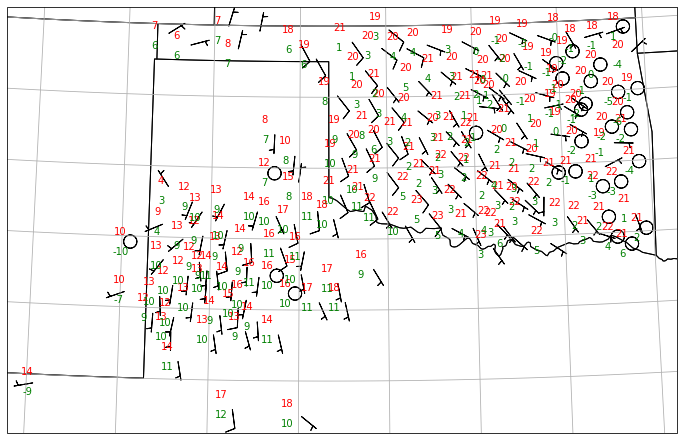

In [19]:
# Set up a plot with map features
fig = plt.figure(figsize=(12, 12))
proj = ccrs.Stereographic(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.gridlines()


# Create a station plot pointing to an Axes to draw on as well as the location of points
stationplot = StationPlot(ax, ok_data['LON'].values, ok_data['LAT'].values, transform=ccrs.PlateCarree(),
                          fontsize=10)
stationplot.plot_parameter('NW', ok_data['TAIR'], color='red')
stationplot.plot_parameter('SW', ok_dewpoint, color='green')
stationplot.plot_barb(ok_u, ok_v)

# Texas Data
stationplot = StationPlot(ax, tx_one_time['Long'].values, tx_one_time['Lat'].values, transform=ccrs.PlateCarree(),
                          fontsize=10)
stationplot.plot_parameter('NW', tx_one_time['2m_temperature'], color='red')
stationplot.plot_parameter('SW', tx_one_time['dewpoint'], color='green')
stationplot.plot_barb(tx_u, tx_v)

This is an informative plot, but is rather crowded. Using MetPy's `reduce_point_density` function, try cleaning up this plot to something that would be presentable/publishable. This function will return a mask, which you'll apply to all arrays in the plotting commands to filter down the data.

In [20]:
# Oklahoma
xy = proj.transform_points(ccrs.PlateCarree(), ok_data['LON'].values, ok_data['LAT'].values)
# Reduce point density so that there's only one point within a 50km circle
ok_mask = mpcalc.reduce_point_density(xy, 50000)

# Texas

# Your code here

# Plot

# Your code here

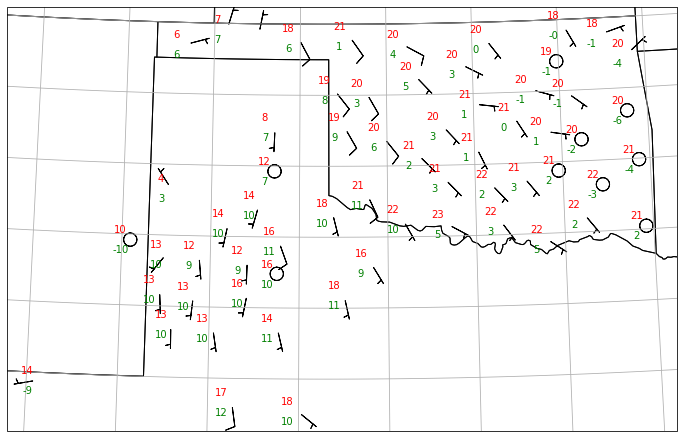

In [21]:
# %load solutions/reduce_and_plot.py


# Cell content replaced by load magic replacement.
xy = proj.transform_points(ccrs.PlateCarree(), tx_one_time['Long'].values, tx_one_time['Lat'].values)
tx_mask = mpcalc.reduce_point_density(xy, 50000)

#Plot

# Set up a plot with map features
fig = plt.figure(figsize=(12, 12))
proj = ccrs.Stereographic(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.gridlines()

# Create a station plot pointing to an Axes to draw on as well as the location of points
stationplot = StationPlot(ax, ok_data['LON'].values[ok_mask], ok_data['LAT'].values[ok_mask], transform=ccrs.PlateCarree(),
                          fontsize=10)
stationplot.plot_parameter('NW', ok_data['TAIR'][ok_mask], color='red')
stationplot.plot_parameter('SW', ok_dewpoint[ok_mask], color='green')
stationplot.plot_barb(ok_u[ok_mask], ok_v[ok_mask])

# Texas Data
stationplot = StationPlot(ax, tx_one_time['Long'].values[tx_mask], tx_one_time['Lat'].values[tx_mask], transform=ccrs.PlateCarree(),
                          fontsize=10)
stationplot.plot_parameter('NW', tx_one_time['2m_temperature'][tx_mask], color='red')
stationplot.plot_parameter('SW', tx_one_time['dewpoint'][tx_mask], color='green')
stationplot.plot_barb(tx_u[tx_mask], tx_v[tx_mask])

<a name="timeseries"></a>
# Creating Time Series for Stations

What if we want to take data from all times from a single station to make a time series (or meteogram) plot? How can we easily do that with Pandas without having to aggregate the data by hand? 

In [22]:
import numpy as np

# Select daylight hours
tx_daytime = tx_data[(tx_data['Time'] >= '2019-03-22 06:00') & (tx_data['Time'] <= '2019-03-22 20:00')]

# Create sub-tables for each station
tx_grp = tx_daytime.groupby('ID')

# Get data from station DIMM
station_data = tx_grp.get_group('DIMM')

# Create hourly averaged data
# time_bins = pd.cut(station_data['Time'], np.arange(600, 2100, 100))
# xarray has groupby_bins, but pandas has cut
station_data.index=station_data['Time']
station_hourly = station_data.resample('H')


# station_hourly = station_data.groupby(time_bins)
station_hourly_mean = station_hourly.mean()
station_hourly_mean = station_hourly_mean.reset_index() # no longer index by time so that we get it back as a regular variable.

# The times are reported at the beginning of the interval, but really represent 
# the mean symmetric about the half hour. Let's fix that.
# from datetime import timedelta timedelta(minutes=30) #
station_hourly_mean['Time'] += pd.to_timedelta(30, 'minutes')
print(station_hourly_mean['Time'])
print(station_data['Time'])

0    2019-03-22 06:30:00
1    2019-03-22 07:30:00
2    2019-03-22 08:30:00
3    2019-03-22 09:30:00
4    2019-03-22 10:30:00
5    2019-03-22 11:30:00
6    2019-03-22 12:30:00
7    2019-03-22 13:30:00
8    2019-03-22 14:30:00
9    2019-03-22 15:30:00
10   2019-03-22 16:30:00
11   2019-03-22 17:30:00
12   2019-03-22 18:30:00
13   2019-03-22 19:30:00
14   2019-03-22 20:30:00
Name: Time, dtype: datetime64[ns]
Time
2019-03-22 06:00:00   2019-03-22 06:00:00
2019-03-22 06:05:00   2019-03-22 06:05:00
2019-03-22 06:10:00   2019-03-22 06:10:00
2019-03-22 06:15:00   2019-03-22 06:15:00
2019-03-22 06:20:00   2019-03-22 06:20:00
                              ...        
2019-03-22 19:40:00   2019-03-22 19:40:00
2019-03-22 19:45:00   2019-03-22 19:45:00
2019-03-22 19:50:00   2019-03-22 19:50:00
2019-03-22 19:55:00   2019-03-22 19:55:00
2019-03-22 20:00:00   2019-03-22 20:00:00
Name: Time, Length: 169, dtype: datetime64[ns]


Use the data above to make a time series plot of the instantaneous data and the hourly averaged data:

In [23]:
# Your code here


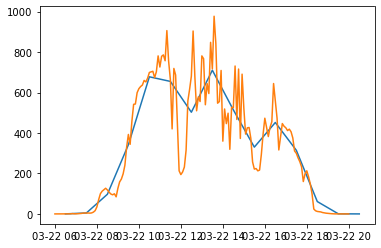

In [24]:
# %load solutions/mesonet_timeseries.py


# Cell content replaced by load magic replacement.
import matplotlib.pyplot as plt
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(station_hourly_mean['Time'], station_hourly_mean['solar_radiation'])
ax.plot(station_data['Time'], station_data['solar_radiation'])